In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score
from keras import layers, optimizers, models
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error
from IPython.display import Image, SVG
import pandas as pd

Using TensorFlow backend.
D:\anaconda\envs\CV2\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\envs\CV2\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\envs\CV2\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\envs\CV2\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarn

In [2]:
col_name = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation',
            'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country',
            'high_income']


In [3]:
train_data = pandas.read_csv("adult.data", encoding="UTF-8", names=col_name, header=None)
test_data = pandas.read_csv("adult.test", encoding="UTF-8", names=col_name,header=None, skiprows=1)

In [4]:
train_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
test_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [6]:
test_data['high_income'] = test_data['high_income'].str.replace('.', '')
train_data = train_data.replace(' ?', np.nan)
test_data = test_data.replace(' ?', np.nan)
train_data = train_data.dropna() 
test_data = test_data.dropna() 
train_data = train_data.drop(['education_num','fnlwgt','capital_gain','capital_loss','native_country'],axis = 1)
test_data = test_data.drop(['education_num','fnlwgt','capital_gain','capital_loss','native_country'],axis = 1)

In [7]:
y_train = train_data['education']
y_test = test_data['education']

In [8]:
X_train = train_data.drop(['education'],axis = 1)
X_test = test_data.drop(['education'],axis = 1)

In [9]:
# one hot
X_train = pd.get_dummies(
    X_train,columns = ['workclass','marital_status','occupation','relationship','race','sex','high_income'])
X_test = pd.get_dummies(
    X_test,columns = ['workclass','marital_status','occupation','relationship','race','sex','high_income'])

In [10]:
X_train

,age,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital_status_ Divorced,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,high_income_ <=50K,high_income_ >50K
0,39,40,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
1,50,13,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,38,40,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
3,53,40,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,28,40,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,38,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
32557,40,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
32558,58,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
32559,22,20,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [11]:
X_test

,age,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital_status_ Divorced,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,high_income_ <=50K,high_income_ >50K
0,25,40,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1,38,50,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,28,40,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,44,40,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
5,34,30,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
16276,39,36,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,1,0,1,0
16278,38,50,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
16279,44,40,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0


In [12]:
# MinMaxScaler 最小最大值標準化
X_train_scaler = MinMaxScaler().fit(X_train)
X_test_scaler = MinMaxScaler().fit(X_test)
X_train = X_train_scaler.transform(X_train)
X_test = X_test_scaler.transform(X_test)

In [13]:
# 對 label做 one hot
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                2944      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
Total params: 6,880
T

24129/24129 [==============================] - 1s 55us/step - loss: 1.7037 - acc: 0.4192 - val_loss: 1.7220 - val_acc: 0.4184

Epoch 00025: val_loss improved from 1.72525 to 1.72197, saving model to ./model.h5
Epoch 26/1000
24129/24129 [==============================] - 1s 54us/step - loss: 1.7001 - acc: 0.4197 - val_loss: 1.7203 - val_acc: 0.4147

Epoch 00026: val_loss improved from 1.72197 to 1.72027, saving model to ./model.h5
Epoch 27/1000
24129/24129 [==============================] - 2s 64us/step - loss: 1.6998 - acc: 0.4186 - val_loss: 1.7191 - val_acc: 0.4146

Epoch 00027: val_loss improved from 1.72027 to 1.71908, saving model to ./model.h5
Epoch 28/1000
24129/24129 [==============================] - 1s 56us/step - loss: 1.6976 - acc: 0.4227 - val_loss: 1.7191 - val_acc: 0.4162

Epoch 00028: val_loss improved from 1.71908 to 1.71907, saving model to ./model.h5
Epoch 29/1000
24129/24129 [==============================] - 1s 52us/step - loss: 1.6960 - acc: 0.4226 - val_loss: 1.7

24129/24129 [==============================] - 1s 55us/step - loss: 1.6645 - acc: 0.4266 - val_loss: 1.6946 - val_acc: 0.4189

Epoch 00066: val_loss did not improve
Epoch 67/1000
24129/24129 [==============================] - 1s 59us/step - loss: 1.6650 - acc: 0.4284 - val_loss: 1.6924 - val_acc: 0.4212

Epoch 00067: val_loss improved from 1.69355 to 1.69245, saving model to ./model.h5
Epoch 68/1000
24129/24129 [==============================] - 2s 64us/step - loss: 1.6639 - acc: 0.4280 - val_loss: 1.6900 - val_acc: 0.4237

Epoch 00068: val_loss improved from 1.69245 to 1.68995, saving model to ./model.h5
Epoch 69/1000
24129/24129 [==============================] - 1s 59us/step - loss: 1.6625 - acc: 0.4272 - val_loss: 1.6913 - val_acc: 0.4247

Epoch 00069: val_loss did not improve
Epoch 70/1000
24129/24129 [==============================] - 1s 55us/step - loss: 1.6615 - acc: 0.4285 - val_loss: 1.7003 - val_acc: 0.4233

Epoch 00070: val_loss did not improve
Epoch 71/1000
24129/24129 [==


Epoch 00108: val_loss did not improve
Epoch 109/1000
24129/24129 [==============================] - 1s 53us/step - loss: 1.6418 - acc: 0.4331 - val_loss: 1.6843 - val_acc: 0.4276

Epoch 00109: val_loss did not improve
Epoch 110/1000
24129/24129 [==============================] - 1s 55us/step - loss: 1.6437 - acc: 0.4352 - val_loss: 1.6860 - val_acc: 0.4250

Epoch 00110: val_loss did not improve
Epoch 111/1000
24129/24129 [==============================] - 1s 58us/step - loss: 1.6429 - acc: 0.4331 - val_loss: 1.6836 - val_acc: 0.4228

Epoch 00111: val_loss did not improve
Epoch 112/1000
24129/24129 [==============================] - 1s 56us/step - loss: 1.6401 - acc: 0.4336 - val_loss: 1.6952 - val_acc: 0.4232

Epoch 00112: val_loss did not improve
Epoch 113/1000
24129/24129 [==============================] - 1s 55us/step - loss: 1.6408 - acc: 0.4336 - val_loss: 1.6827 - val_acc: 0.4257

Epoch 00113: val_loss improved from 1.68328 to 1.68275, saving model to ./model.h5
Epoch 114/1000
2

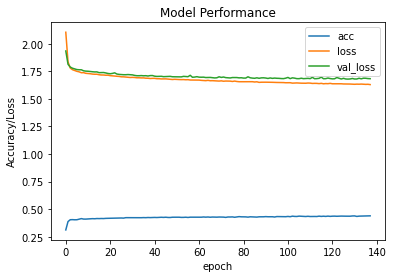

In [14]:
# 建構 model
model = models.Sequential()
model.add(layers.Dense(64, input_shape=(X_train.shape[1],), activation="sigmoid"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dropout(0.05))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(16, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 顯示模型摘要與結構
model.summary()

es = EarlyStopping(monitor='val_loss', patience=10, mode='auto', verbose=1)
checkpointer = ModelCheckpoint('./model.h5',verbose=1, save_best_only=True)

# 開始訓練 model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=1000, batch_size=128, callbacks=[es,checkpointer])

print("[INFO] Best loss: {}".format(np.min(history.history['loss'])))
print("[INFO] Best acc: {}".format(np.max(history.history['acc'])))
print("[INFO] Best val_loss: {}".format(np.min(history.history['val_loss'])))
print("[INFO] Best val_acc: {}".format(np.max(history.history['val_acc'])))

plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Performance')
plt.ylabel('Accuracy/Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

# 預測

In [15]:
# 評估指標
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Acc : " + str(accuracy))
print("Test Loss : " + str(loss))

15060/15060 [==============================] - 1s 58us/step
Test Acc : 0.43120849930432686
Test Loss : 1.6822514841122773


In [16]:
y_pred = model.predict(X_test)
# y_pred = np.argmax(y_pred, axis=1)
y_true = y_test

In [17]:
for i in range(len(y_pred)):
        max_value=max(y_pred[i])
        for j in range(len(y_pred[i])):
            if max_value==y_pred[i][j]:
                y_pred[i][j]=1
            else:
                y_pred[i][j]=0

In [18]:
y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
print('Precision : ' + str(precision_score(y_true, y_pred, average='weighted')))
print('Recall : ' + str(recall_score(y_true, y_pred, average='weighted')))
print('F1 : ' + str(f1_score(y_true,  y_pred, average='weighted')))

Precision : 0.3638863947756511
Recall : 0.43120849933598937
F1 : 0.3615557206830723


D:\anaconda\envs\CV2\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
